In [3]:
import pandas as pd
import numpy as np
from apyori import apriori
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv(f'../../data/Sales_Invoice_Line.csv')
df.columns

Index(['Sell-to Customer No_', 'Document No_', 'Line No_', 'Type', 'No_',
       'Location Code', 'Quantity', 'Amount', 'Amount Including VAT',
       'Posting Date', 'Quantity (Base)', 'Unit Cost (LCY)', 'Unit Cost',
       'Unit Price', 'Unit of Measure', 'Unit of Measure Code',
       'Qty_ per Unit of Measure'],
      dtype='object')

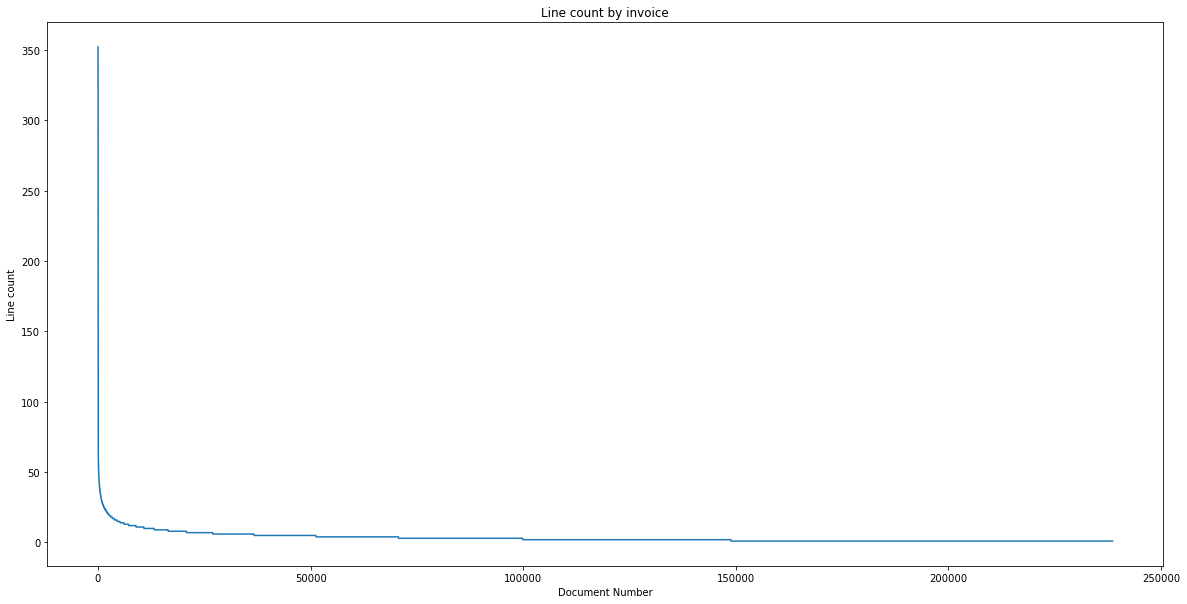

In [5]:
document_count = df[['Document No_', 'No_']].groupby('Document No_').count().sort_values(by='No_', ascending=False).reset_index()


plt.figure(figsize=(20, 10))
plt.plot(document_count['No_'])
plt.ylabel('Line count')
plt.xlabel('Document Number')
plt.title('Line count by invoice')
plt.show()


In [8]:
document_subset = document_count.head(500)['Document No_']

print('Subset:', document_subset.shape)

association_df = df[df['Document No_'].astype(str).isin(document_subset.tolist())].reset_index(drop=True)

dummy_liquors = pd.get_dummies(association_df['No_']).reset_index(drop=True)

dummy_liquors

Subset: (500,)


,Sell-to Customer No_,Document No_,Line No_,Type,No_,Location Code,Quantity,Amount,Amount Including VAT,Posting Date,Quantity (Base),Unit Cost (LCY),Unit Cost,Unit Price,Unit of Measure,Unit of Measure Code,Qty_ per Unit of Measure
0,4GBW,SI+341309,10000,2,ITSGCERO7518,FDL,1.0,108.0,108.0,2019-08-27 00:00:00.000,12.0,51.44424,51.44424,108.0,CASE,CASE,12
1,4LINW,SI+289405,10000,2,ITNCVE7515,FDL,1.0,120.0,120.0,2017-04-17 00:00:00.000,12.0,54.30396,54.30396,120.0,CASE,CASE,12
2,3EVINE,SI+355798,10000,2,ITACRIP7516,FDL,1.0,168.0,168.0,2020-05-19 00:00:00.000,12.0,71.15712,71.15712,168.0,CASE,CASE,12
3,1WMERC,SI+328040,10000,2,ITARGA7517,FDL,1.0,84.0,84.0,2019-01-04 00:00:00.000,12.0,48.87036,48.87036,84.0,CASE,CASE,12
4,2MLR,SI+251931,10000,2,ITTDAG7512,FDL,1.0,128.0,128.0,2015-09-03 00:00:00.000,12.0,48.74808,48.74808,128.0,CASE,CASE,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,6PRESS,SI+283618,10000,2,ITDDAC7512,NYC,2.0,0.0,0.0,2017-01-13 00:00:00.000,2.0,5.92306,5.92306,0.0,BOTTLE,BOTTLE,1
25200,6PRESS,SI+292841,10000,2,ITLUICAB7515,NYC,2.0,0.0,0.0,2017-06-07 00:00:00.000,2.0,5.43533,5.43533,0.0,BOTTLE,BOTTLE,1
25201,6PRESS,SI+319716,10000,2,ITBRBB7516,NYC,2.0,0.0,0.0,2018-08-22 00:00:00.000,2.0,11.21608,11.21608,0.0,BOTTLE,BOTTLE,1
25202,6PRESS,SI+335504,10000,2,ITBRGM7517,NYC,2.0,0.0,0.0,2019-05-10 00:00:00.000,2.0,6.97559,6.97559,0.0,BOTTLE,BOTTLE,1


In [83]:
print(dummy_liquors.shape)
print(association_df.shape)

association_df = association_df.reset_index(drop=True)

association_df_complete = pd.concat([association_df['Document No_'], dummy_liquors], axis=1)

association_df_complete

(25204, 3918)
(25204, 17)


,Document No_,ARKRBR75NV,ARKRCW7514,ARKRCW7517,ARKRRB7514,ARKRRB7516,ARKRRES7513,CHBVCARL7517,CHBVCARL7518,CHBVCSRL7516,...,XFBOSG0775,XFBOSPN0975,XFGOCB75NV,XFGOCR75NV,XFGOGR75NV,XFGOGR75NV6P,XFSSMBCP0375,XFSSMBCP0575,XFSSMBCR0575,XFSSMBGI0375
0,SI+341309,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SI+289405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SI+355798,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SI+328040,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SI+251931,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,SI+283618,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25200,SI+292841,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25201,SI+319716,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25202,SI+335504,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
association_df_complete = association_df_complete.groupby('Document No_').sum()

association_df_complete

,ARKRBR75NV,ARKRCW7514,ARKRCW7517,ARKRRB7514,ARKRRB7516,ARKRRES7513,CHBVCARL7517,CHBVCARL7518,CHBVCSRL7516,CHBVCSRL7517,...,XFBOSG0775,XFBOSPN0975,XFGOCB75NV,XFGOCR75NV,XFGOGR75NV,XFGOGR75NV6P,XFSSMBCP0375,XFSSMBCP0575,XFSSMBCR0575,XFSSMBGI0375
Document No_,,,,,,,,,,,,,,,,,,,,,
SI+136132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI+136618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI+137144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI+137966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
SI+138234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI+373446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI+373867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SI+374026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
for col in association_df_complete.columns:
    association_df_complete[col] = association_df_complete[col].astype(str).replace('1', col).replace('0', np.nan)

In [100]:
association_list = association_df_complete.to_numpy()

association_list

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [102]:
association_list_clean = []

for i in range(len(association_list)):
    association_list_clean.append(association_list[i][np.logical_not(pd.isnull(association_list[i]))])

association_list_clean[0:10]

[array(['ITAGBN0475', 'ITAGNC0775', 'ITARCABP0875', 'ITARGA0875',
        'ITARGISI0675', 'ITBIPDE0875', 'ITCAAM0575', 'ITCAPT0675',
        'ITCASS0675', 'ITCESC0875', 'ITCEVC0575', 'ITCGBCM0575',
        'ITCGBN0475', 'ITCGRO0875', 'ITCHCO0875', 'ITCLNERO0875',
        'ITCLROS0775', 'ITCMMP0775', 'ITDLBA0875', 'ITDLBR0475',
        'ITDLNE0775', 'ITFEMF0775', 'ITFEVN0775', 'ITFRASU0675',
        'ITGARB0775', 'ITGHMPPN0675', 'ITGHTLPG0875', 'ITLUBO0875',
        'ITMERT0775', 'ITPCDLSJ0775', 'ITPNCAP0875', 'ITPPZCR0575',
        'ITPRBATO0575', 'ITSGCECH0775', 'ITSGCEVN0675', 'ITSTPR0675',
        'ITSTTGL0875', 'ITSTVALP0875', 'ITTDFG0875'], dtype=object),
 array(['ITABKE0875', 'ITABLG0875', 'ITABPG0875', 'ITABPN0775',
        'ITAGNC0775', 'ITAGNOAL0875', 'ITARCABP0875', 'ITARGIOR0875',
        'ITARGISI0675', 'ITBTMZ0775', 'ITCAAM0575', 'ITCAPT0675',
        'ITCASCH0875', 'ITCASS0675', 'ITCEFS0775', 'ITCESC0875',
        'ITCEVC0575', 'ITCGBN0475', 'ITCHCO0875', 'ITCLNERO0875',


In [103]:
from apyori import apriori

In [125]:
association_rules = apriori(
    association_list_clean, 
    min_support=0.05, 
    min_confidence=0.25, 
    min_lift=3, 
    min_length=2
    )

association_results = list(association_rules)

In [126]:
print('\nTotal of association rules found:', len(association_results), '\n')

for item in association_results:
    pair_x = item[2][0][0]
    pair_y = item[2][0][1]
    items_x = [x for x in pair_x]
    items_y = [y for y in pair_y]
    
    print("Rule: " + str(items_x) + "->" + str(items_y))
    
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("="*80, '\n')


Total of association rules found: 310 

Rule: ['ITAGBN7509']->['ITGHTLPG7513']
Support: 0.054
Confidence: 0.8709677419354839
Lift: 8.538899430740038

Rule: ['ITAGNCSC7512']->['ITARARPG7513']
Support: 0.056
Confidence: 0.6363636363636365
Lift: 6.00343053173242

Rule: ['ITAGNCSC7512']->['ITBRGM7513']
Support: 0.05
Confidence: 0.5681818181818182
Lift: 6.313131313131314

Rule: ['ITAGNCSC7512']->['ITDLBR7510']
Support: 0.05
Confidence: 0.5681818181818182
Lift: 5.797773654916512

Rule: ['ITAGNCSC7512']->['ITGHTLPG7513']
Support: 0.05
Confidence: 0.5681818181818182
Lift: 5.570409982174689

Rule: ['ITAGNCSC7512']->['ITMERB7511']
Support: 0.052
Confidence: 0.5909090909090909
Lift: 4.047322540473226

Rule: ['ITAGNCSC7512']->['ITPNVM7513']
Support: 0.05
Confidence: 0.5681818181818182
Lift: 6.929046563192905

Rule: ['ITAGNCSC7512']->['ITSGCEVN7511']
Support: 0.056
Confidence: 0.6363636363636365
Lift: 5.303030303030304

Rule: ['ITAGNCSC7512']->['ITSNCO7513']
Support: 0.062
Confidence: 0.7045454545